<a href="https://colab.research.google.com/github/Imad-BOUZGOU/velibProject/blob/main/velib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [266]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import random
from random import randrange
from datetime import timedelta
from datetime import datetime
from math import sin, cos, sqrt, atan2, radians


pd.options.display.max_colwidth = 1000

# FONCTIONS :

In [267]:
## Générer des dates aléatoires

def random_date(start, end):
    """
    This function will return a random datetime between two datetime 
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return start + timedelta(seconds=random_second)

In [268]:
def nearestStation(s,x):
  ss=stations[stations['satation_id']==s].iloc[0]
  disOpt=10000

  for index, station in stations.iterrows():
       if (ss['satation_id']!= station['satation_id']) :
            distance=calcul_distance(ss['station_lat'],ss['station_long'],station['station_lat'],station['station_long'])
            ## on doit vérifier aussi la disponibilté des vélos si 'pick' ou bien des places si 'return'
            if (disOpt>distance and ((x=='pick' and station['bikeDispo']>0) or (x=='return' and station['placeDispo']>0) )):
              disOpt=distance
              nearestStation=station['satation_id']

  return nearestStation,disOpt





In [269]:
#### Lecture des données
stations = pd.read_csv('/content/stations.csv', error_bad_lines=False)
#### Affichage des données
stations=stations.sort_values('satation_id', ascending=False)
print(stations)
stations = stations.drop_duplicates(subset='satation_id', keep='first')
print(stations.duplicated().sum())




        satation_id           station_name  station_lat  station_long
61268           230       8D QC Station 02     0.000000      0.000000
37536           229       8D QC Station 01     0.000000      0.000000
116724          228     One Memorial Drive    42.361619    -71.080436
144314          228     One Memorial Drive    42.361619    -71.080436
112942          228     One Memorial Drive    42.361619    -71.080436
...             ...                    ...          ...           ...
165197            1  18 Dorrance Warehouse    42.387151    -71.075978
70813             1  18 Dorrance Warehouse    42.387151    -71.075978
141286            1  18 Dorrance Warehouse    42.387151    -71.075978
159122            1  18 Dorrance Warehouse    42.387151    -71.075978
122867            1  18 Dorrance Warehouse    42.387151    -71.075978

[165386 rows x 4 columns]
0


In [270]:

def calcul_distance(lat1,lon1,lat2,lon2):
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance
    

In [271]:
def executeRequest(request):## return 1 si la requeste est satisfaite , -1 sinon
  if ((request['action']=='pick' and stations[stations['satation_id']==request['s']]['bikeDispo'].values[0]>0) or (request['action']=='return' and stations[stations['satation_id']==request['d']]['placeDispo'].values[0]>0) ):

      if (request['action']=='pick'):
        s=stations[stations['satation_id']==request['s']]
        s['bikeDispo'].values[0]=s['bikeDispo'].values[0]-1
        s['placeDispo'].values[0]=s['placeDispo'].values[0]+1
        stations[stations['satation_id']==request['s']]=s
      else :
        s=stations[stations['satation_id']==request['d']]
        s['bikeDispo'].values[0]=s['bikeDispo'].values[0]+1
        s['placeDispo'].values[0]=s['placeDispo'].values[0]-1
        stations[stations['satation_id']==request['d']]=s
      return 1
  else :
      return -1




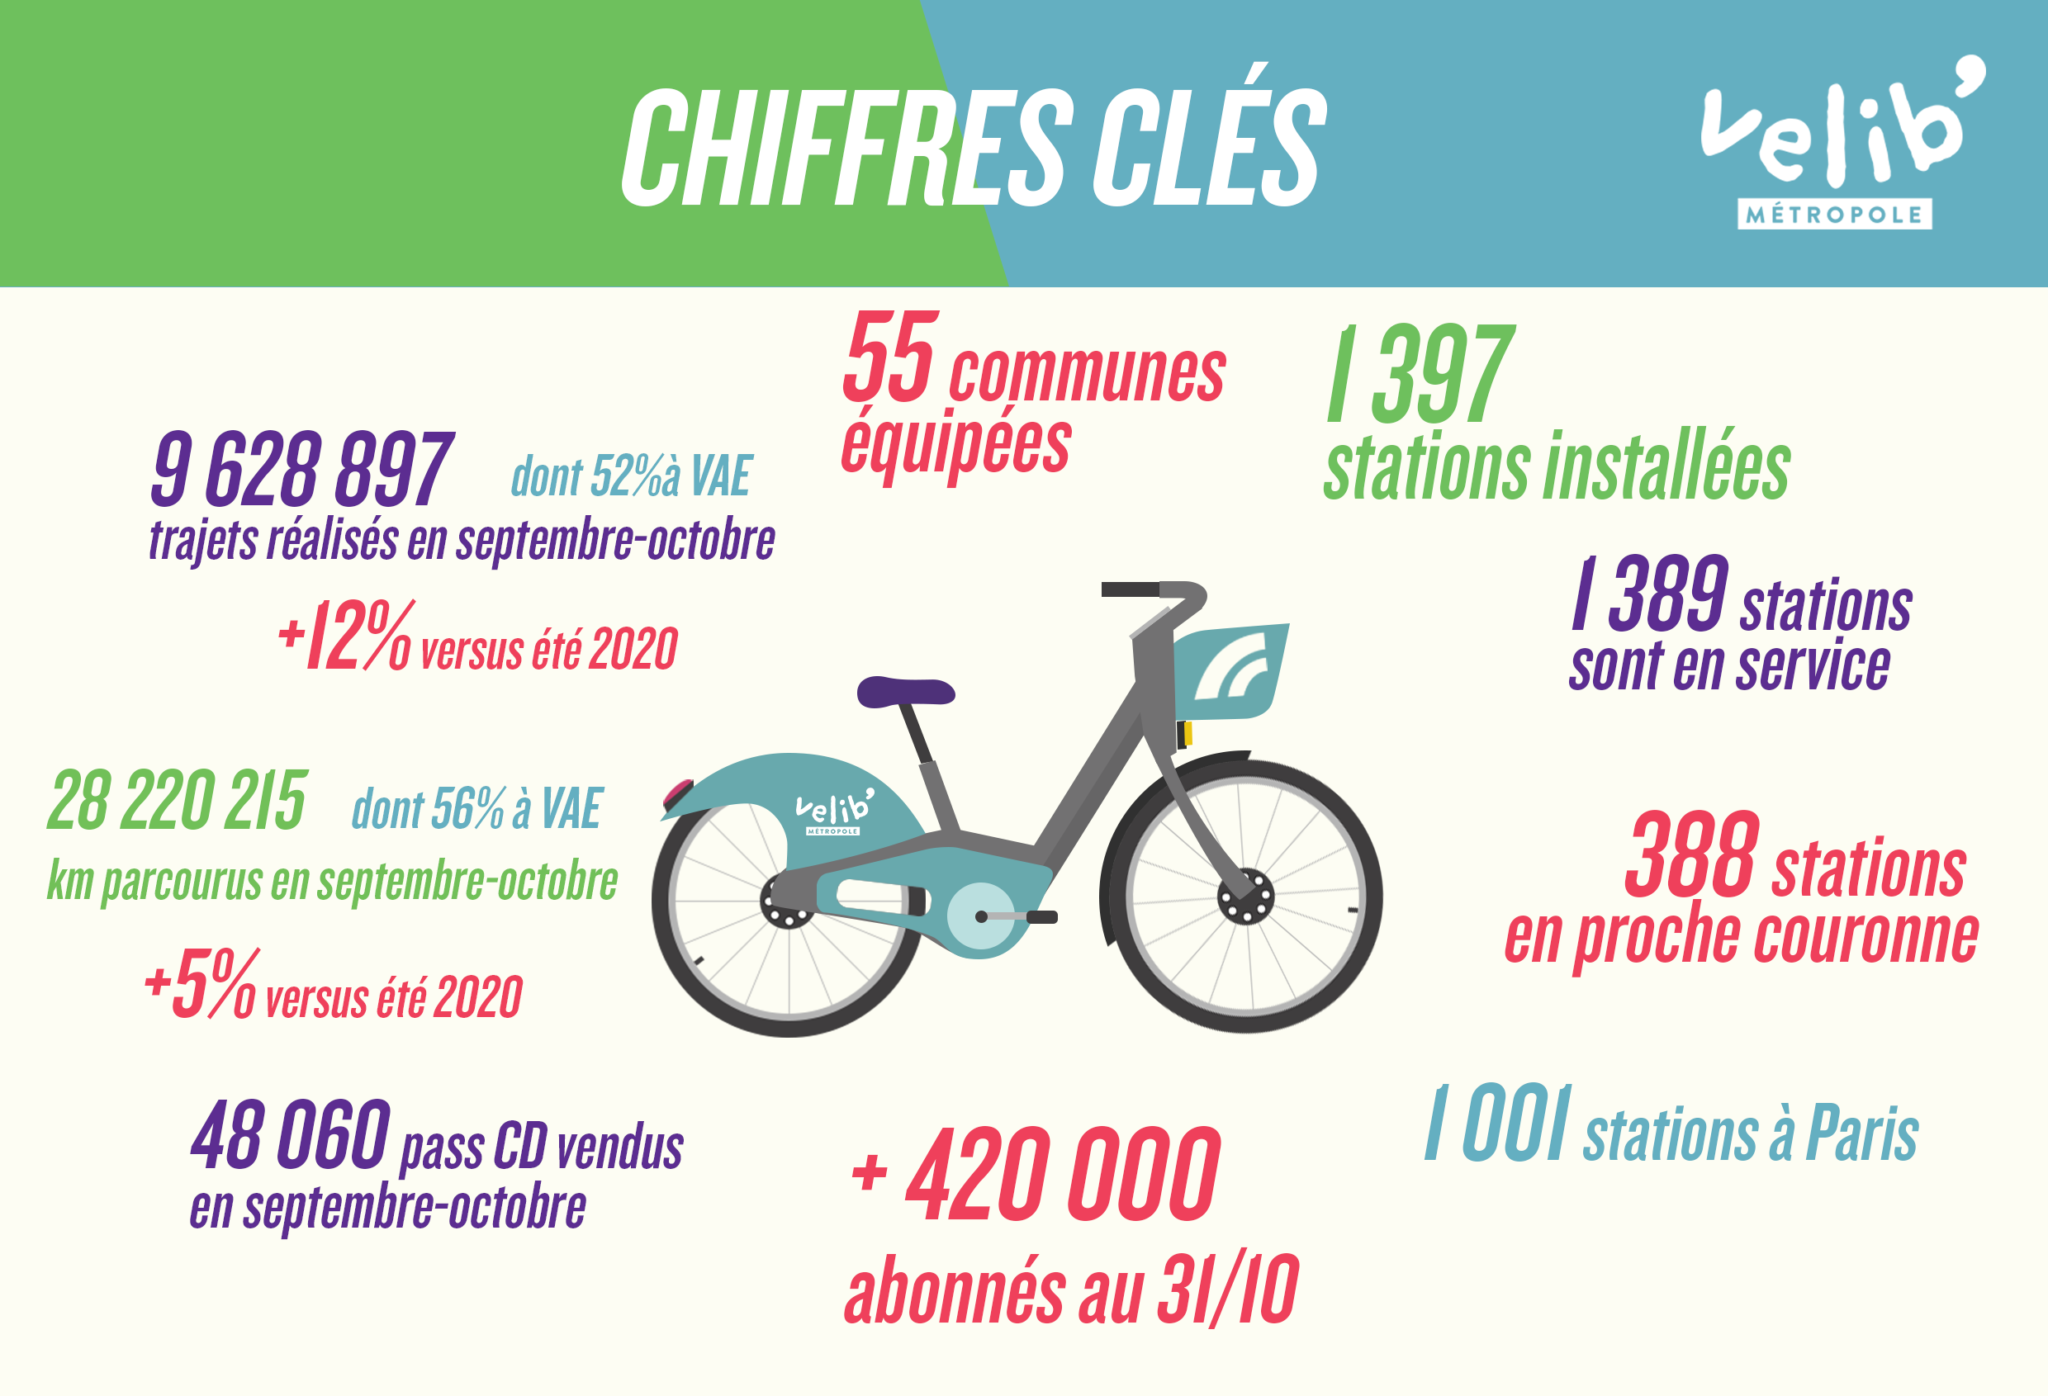

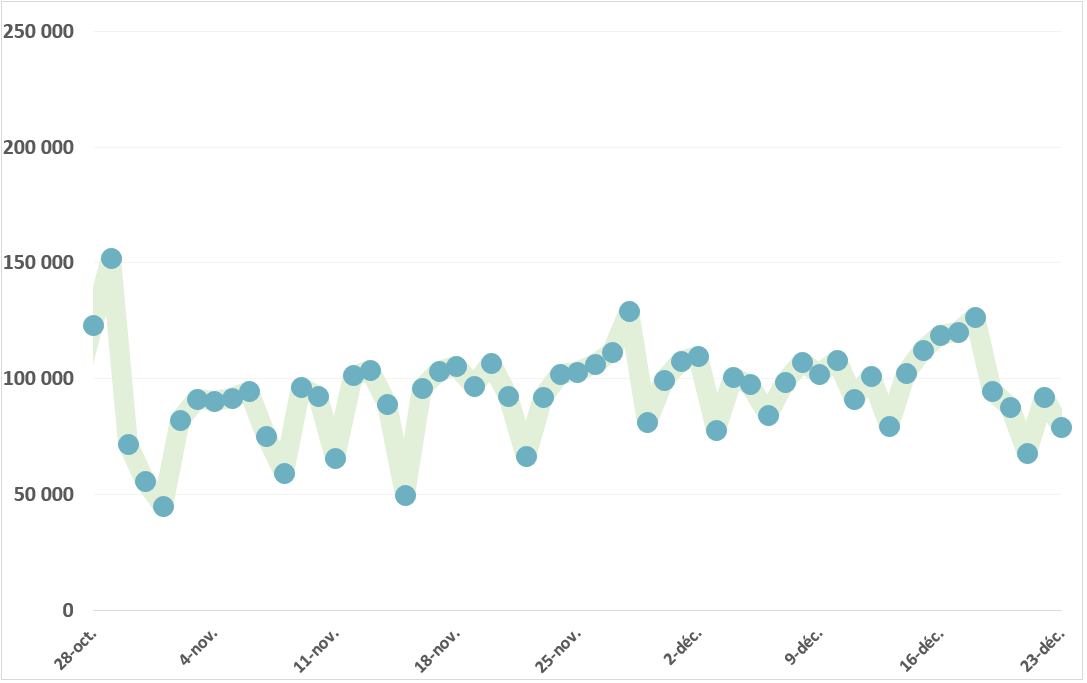

Les parametres du systeme :



*   Nombre de stations: 191
*   Nombre de clients : 20 000
*   Nobre de requetes : 20 000





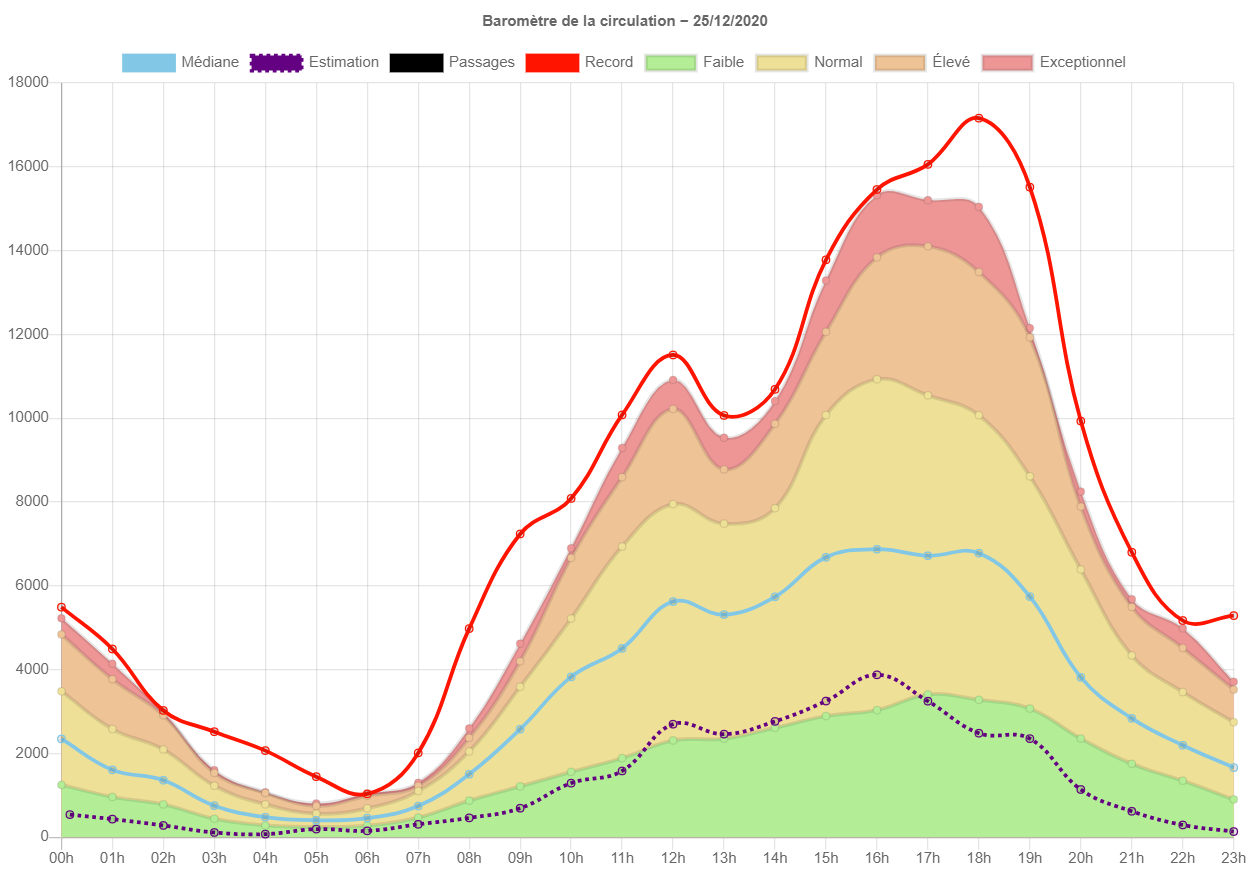

In [272]:
## associer un taux pour chaque tranche horaire
rate=[0.04, 0.02, 0.02, 0.04, 0.06, 0.08, 0.12, 0.14, 0.20, 0.14, 0.10, 0.04]
dates=[datetime.strptime('4 12 2020 00:00', '%d %m %Y %H:%M'),datetime.strptime('4 12 2020 02:00', '%d %m %Y %H:%M'),datetime.strptime('4 12 2020 04:00', '%d %m %Y %H:%M'),datetime.strptime('4 12 2020 06:00', '%d %m %Y %H:%M'),datetime.strptime('4 12 2020 08:00', '%d %m %Y %H:%M'),datetime.strptime('4 12 2020 10:00', '%d %m %Y %H:%M'),datetime.strptime('4 12 2020 12:00', '%d %m %Y %H:%M'),datetime.strptime('4 12 2020 14:00', '%d %m %Y %H:%M'),datetime.strptime('4 12 2020 16:00', '%d %m %Y %H:%M'),datetime.strptime('4 12 2020 18:00', '%d %m %Y %H:%M'),datetime.strptime('4 12 2020 20:00', '%d %m %Y %H:%M'),datetime.strptime('4 12 2020 22:00', '%d %m %Y %H:%M'),datetime.strptime('4 12 2020 23:59', '%d %m %Y %H:%M')]


## Initialiser les stations 

In [273]:
stations = stations[~((stations.station_long <= -80) | (stations.station_long >= -71) |
                 (stations.station_lat <= 41) | (stations.station_lat >= 43)) ]

#print(usa[usa.STATE_ABBR == 'MA'].geometry)
stations.describe()

,satation_id,station_lat,station_long
count,191.000000,191.000000,191.000000
mean,109.612565,42.355556,-71.085806
std,66.082697,0.021972,0.031349
min,1.000000,42.303469,-71.166491
25%,53.500000,42.343853,-71.108189
50%,105.000000,42.355549,-71.084955
75%,169.500000,42.370773,-71.062933
max,228.000000,42.406302,-71.006098


In [274]:
## On suppose que la capacité de chaque station est 40

capacity=pd.DataFrame(np.random.randint(30,40,size=(191, 1)))
placeDispo=0

stations['capacity']=capacity.values
stations['bikeDispo']=capacity.values
stations['placeDispo']=0
STATIONSS=stations
stations.head()



,satation_id,station_name,station_lat,station_long,capacity,bikeDispo,placeDispo
116724,228,One Memorial Drive,42.361619,-71.080436,31,31,0
11646,227,Silber Way,42.349496,-71.100576,30,30,0
73347,226,Commonwealth Ave At Babcock St,42.351547,-71.121262,31,31,0
98039,225,Cambridge Dept. of Public Works -147 Hampshire St.,42.371197,-71.097599,31,31,0
59289,224,Fresh Pond Reservation,42.382678,-71.143479,39,39,0


### Afficher les stations sur la carte de Boston

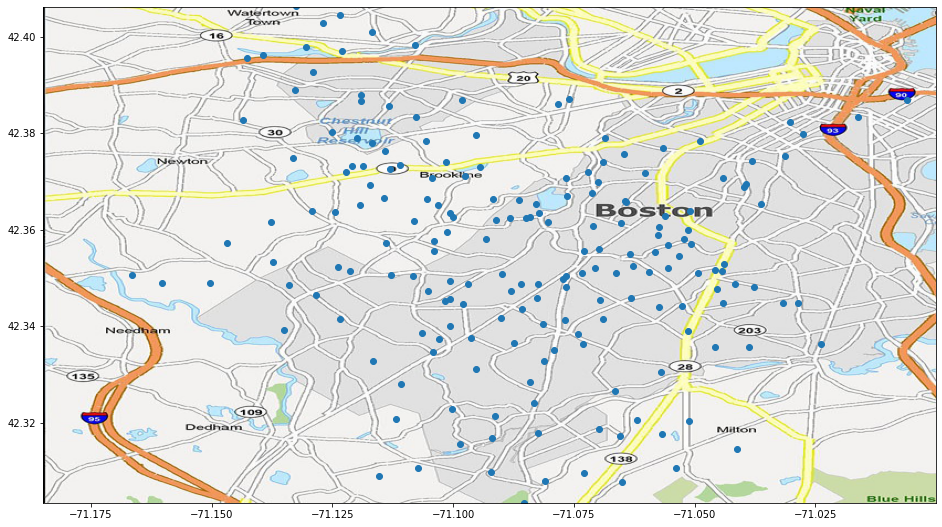

In [275]:


img = plt.imread("/content/boston.jpg")


fig, ax = plt.subplots(1, 1, figsize=(16,12))
x = range(300)
ax.imshow(img, extent=[-71.185
, -71.000098, 42.303460, 42.406102])
ax.scatter(stations.station_long, stations.station_lat)



### Générer des clients avec des localisations aléatoirement 

In [276]:
### on génère 20 000 utilisateurs
nbUsers=21000
latitude=pd.DataFrame(np.random.uniform(42.303460,42.406102,size=(nbUsers, 1)))
longitude=pd.DataFrame(np.random.uniform(-71.185,-71.000098,size=(nbUsers, 1)))
valCritique=pd.DataFrame(np.random.uniform(1,5,size=(nbUsers, 1)))

users=pd.DataFrame(index=range(nbUsers))
users['idUser'] = users.index 
users['lat'] = latitude
users['long']=longitude
users['c']=valCritique
print(users.head())


   idUser        lat       long         c
0       0  42.385627 -71.171011  1.866029
1       1  42.361068 -71.032188  3.416663
2       2  42.398991 -71.104465  1.708308
3       3  42.332569 -71.027129  1.158358
4       4  42.353091 -71.128121  3.165592


### Afficher les usitilisateur sur la carte de Boston

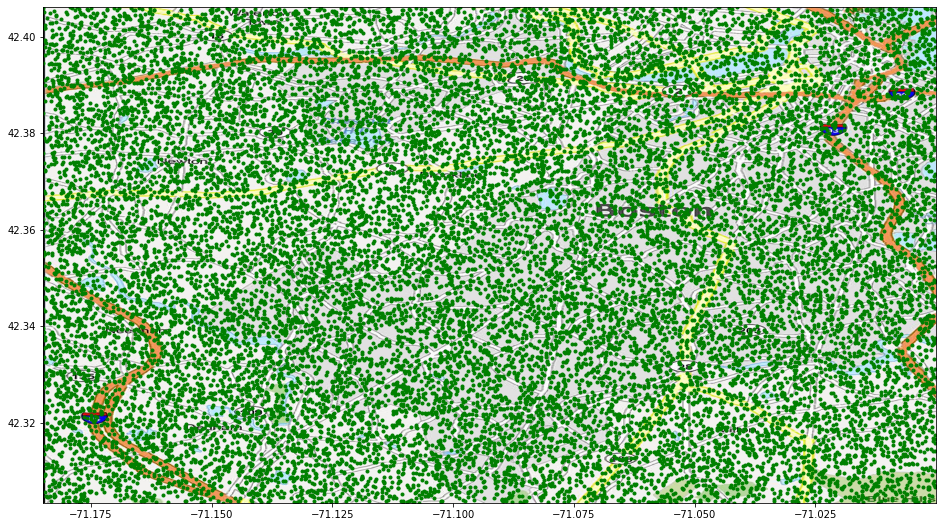

In [277]:
fig, ax = plt.subplots(1, 1, figsize=(16,12))
x = range(300)
ax.imshow(img, extent=[-71.185
, -71.000098, 42.303460, 42.406102])
ax.plot(users.long, users.lat, '.', linewidth=5, color='green')

### fonction pour calculer la distance entre deux points


# Générer des requetes de la forme (source, distination, date)


In [278]:
### générer des actions de cliens
requests=pd.DataFrame(columns=['s','d','time','action','user'])

#print(random_date(d1, d2))

def getRequest(date_1,date_2):
    #choisir une date aléatoire en date_1 et date_2
    date=random_date(date_1, date_2)
    find=False
    while find!=True:
      #Choisir une tation de départ
      s=np.random.choice(stations['satation_id'])
      #choisir une station d'arrivée
      d=np.random.choice(stations['satation_id'])

      sSource=stations[stations['satation_id']==s]
      sDistination=stations[stations['satation_id']==d]

      ## Calculer la distance entre les deux stations
      distance=calcul_distance(sSource['station_lat'],sSource['station_long'],sDistination['station_lat'],sDistination['station_long'])
      #print(distance)
      if((s!=d)and(distance<5)):# Si la distance < 5km
          find=True
          ## on éstime que la vitesse moyenne d'un vélo est 16km/h ==> 0.26 km/mn
          duration=distance//0.26
          return (s,d,date,duration)


In [279]:

idUser=0
idRequest=0
trajet=[]
for slices in range(12):
  nbRequest=0
  
  while nbRequest<(rate[slices]*1000*2):
    r=getRequest(dates[slices],dates[slices+1])
    r1=(r[0],r[1],r[2],'pick',users['idUser'][idUser])
    r2=(r[0],r[1], r[2]+ timedelta(0,r[3]*60),'return',users['idUser'][idUser]) #on rajoute la durée
    requests.loc[idRequest] = r1
    requests.loc[idRequest+1] = r2
    nbRequest=nbRequest+2
    idRequest=idRequest+2
    idUser=idUser+1
  trajet.append(nbRequest/2)

trajet.append(nbRequest/2)


In [280]:
print (requests.describe())
print('\n\n')
print (requests.head())

             s       d                 time  action    user
count   2000.0  2000.0                 2000    2000  2000.0
unique   189.0   187.0                 1970       2  1000.0
top       22.0   143.0  2020-12-04 17:37:34  return   999.0
freq      28.0    28.0                    3    1000     2.0
first      NaN     NaN  2020-12-04 00:01:14     NaN     NaN
last       NaN     NaN  2020-12-05 00:15:06     NaN     NaN



     s    d                time  action user
0  212  135 2020-12-04 00:55:49    pick    0
1  212  135 2020-12-04 01:05:49  return    0
2   66  174 2020-12-04 00:15:12    pick    1
3   66  174 2020-12-04 00:23:12  return    1
4   43  219 2020-12-04 01:03:18    pick    2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


In [281]:
requests=requests.sort_values(by="time")
requests=requests.reset_index()
del requests['index']
    


In [282]:
print(requests.head())

     s    d                time  action user
0   72   46 2020-12-04 00:01:14    pick   25
1  227  113 2020-12-04 00:03:16    pick   36
2  149   50 2020-12-04 00:04:10    pick   14
3   72   46 2020-12-04 00:09:14  return   25
4   81   91 2020-12-04 00:13:34    pick   32


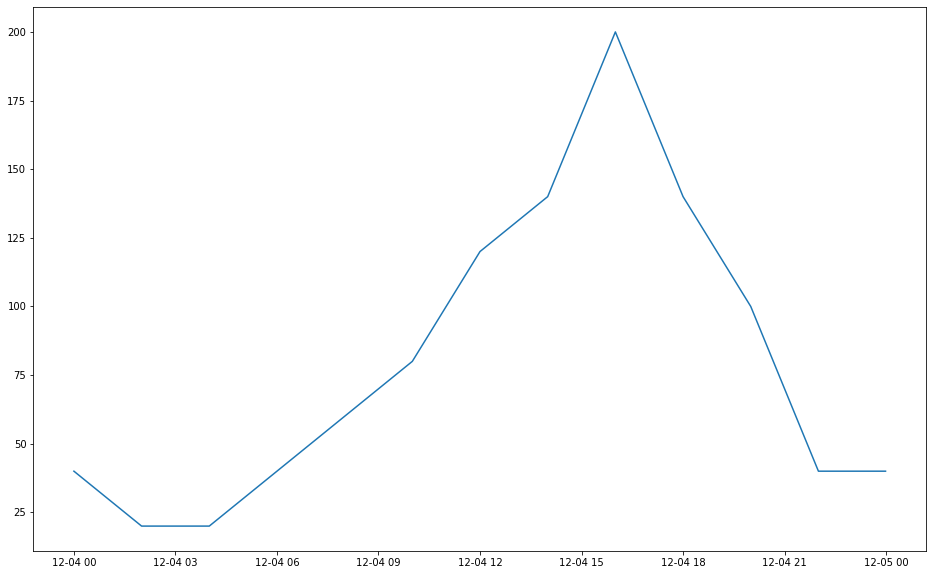

In [283]:
plt.figure(figsize=(16, 10))
plt.plot(dates, trajet)
plt.show()

# Fonction calcul la station voisine la plus proche disponible


[texte du lien](https:// [texte du lien](https://))# implementation de procédure 1


In [284]:

distanceMax = 0.5

def Procedure1(request):
  user=request['user']
  x=request['action']
  t=request['time']
  if (x=='pick'):
      location=request['s']
  else :
      location=request['d']


  l=stations[stations['satation_id']==location].iloc[0]
  disOpt=distanceMax
  nearestStation=-1
  for index, station in stations.iterrows():
       if (l['satation_id']!= station['satation_id']) :
            distance=calcul_distance(l['station_lat'],l['station_long'],station['station_lat'],station['station_long'])
            ## on doit vérifier aussi la disponibilté des vélos si 'pick' ou bien des places si 'return'
            if (disOpt>distance and ((x=='pick' and station['bikeDispo']>0) or (x=='return' and station['placeDispo']>0) )):
              disOpt=distance
              nearestStation=station['satation_id']
  
  p=PRICINGMECHANISM(disOpt,t,user)
  if (nearestStation != -1):
    if (x=='pick'):
      request['s']=nearestStation
    else:
      request['d']=nearestStation
    
  return p,request


# **implementation de procédure 2**

In [285]:
def PRICINGMECHANISM(distance,t,user):
  b=B[t.hour//2] ### récupérer le budget de la tranche horaire 
  p=np.random.choice(prices)
  if (b-p>=0 and p>= users[users['idUser']==user]['c'].iloc[0]):
      B[t.hour//2]=B[t.hour//2]-p
      return p
  else :
     return -1
    

# Simulation

In [286]:
prices=[1, 1.25, 1.50, 1.75, 2, 2.25, 2.50, 2.75, 3, 3.25, 3.50, 3.75, 4]


dailyB=1000
out=pd.DataFrame(columns=['dailyB','NoService'])
while (dailyB<10000):
  stations=STATIONSS
  B=[dailyB*0.04, dailyB*0.02, dailyB*0.02, dailyB*0.04, dailyB*0.06, dailyB*0.08, dailyB*0.12, dailyB*0.14, dailyB*0.2, dailyB*0.14, dailyB*0.1, dailyB*0.04]
  print(B)
  noService=0
  for index, request in requests.iterrows():
    #[0]=00:00->02:00, [1]=02:00->04:00, [2]=04:00->06:00 ............ [11]=22:00->00:00
     if executeRequest(request)==-1:
          p=Procedure1(request)
          if (p[0]==-1):
            noService=noService+1
          else: 
            executeRequest(p[1])

  out=out.append({'dailyB':dailyB,'NoService':noService}, ignore_index=True)

  print(dailyB)
  print(B)
  dailyB=dailyB+2000




[40.0, 20.0, 20.0, 40.0, 60.0, 80.0, 120.0, 140.0, 200.0, 140.0, 100.0, 40.0]
1000
[4.75, 4.75, 3.25, 1.25, 19.25, 30.5, 55.75, 85.75, 111.75, 69.25, 52.75, 23.0]
[120.0, 60.0, 60.0, 120.0, 180.0, 240.0, 360.0, 420.00000000000006, 600.0, 420.00000000000006, 300.0, 120.0]
3000
[114.25, 60.0, 48.5, 98.5, 155.25, 228.0, 324.75, 378.00000000000006, 543.25, 350.25000000000006, 263.0, 109.5]
[200.0, 100.0, 100.0, 200.0, 300.0, 400.0, 600.0, 700.0000000000001, 1000.0, 700.0000000000001, 500.0, 200.0]
5000
[187.5, 93.5, 100.0, 179.5, 272.25, 389.0, 568.5, 661.2500000000001, 931.0, 643.7500000000001, 469.25, 186.5]
[280.0, 140.0, 140.0, 280.0, 420.0, 560.0, 840.0, 980.0000000000001, 1400.0, 980.0000000000001, 700.0, 280.0]
7000
[262.0, 130.75, 137.0, 256.0, 403.5, 536.75, 796.25, 944.0000000000001, 1338.75, 912.7500000000001, 642.0, 266.5]
[360.0, 180.0, 180.0, 360.0, 540.0, 720.0, 1080.0, 1260.0000000000002, 1800.0, 1260.0000000000002, 900.0, 360.0]
9000
[344.0, 169.5, 176.0, 335.25, 512.0, 69

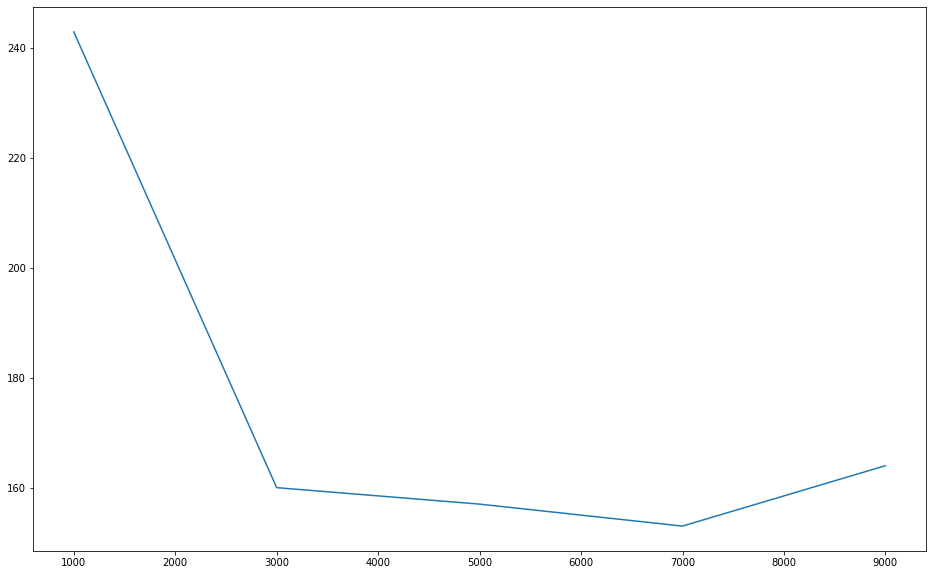

In [287]:
plt.figure(figsize=(16, 10))
plt.plot(out['dailyB'], out['NoService'])
plt.show()